# TUBES Probabilitas dan Statistika <br>
## Gabriel Marcellino Joestiawan <br>
## 18222115 <br>

## Import Libraries

In [1440]:
# General Libraries
import pandas as pd
import numpy as np

import statsmodels.api as sm
from scipy import stats as st
import math
import scipy.stats as stats
from scipy.stats import chisquare
from statsmodels.stats.weightstats import ztest as ztest
import random
# Visualisastion Libraries
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [1441]:
pd.set_option('display.max_rows', None)

In [1442]:
raw = pd.read_excel("18222115.xlsx")

## 1. Data Understanding

### General Information <br>
1. Ukuran Sample ? <br>
2. Jumlah Atribut ? <br>

In [1443]:
# General Information
raw.info()

# 1. Ukuran Sample : 338.8 KB
# 2. Jumlah Atribut : 289 x 150


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Columns: 151 entries, Jenis Kelamin to keluhan_belanja_online_6
dtypes: float64(3), int64(1), object(147)
memory usage: 341.1+ KB


In [1444]:
raw.describe()

,Usia,Unnamed: 6,Durasi Penggunaan Internet per Hari (dalam Jam),ecommerce_pilihan_12
count,289.000000,0.0,215.000000,0.0
mean,30.439446,NaN,8.725581,NaN
std,14.117462,NaN,4.317325,NaN
min,16.000000,NaN,2.000000,NaN
25%,19.000000,NaN,5.000000,NaN
50%,21.000000,NaN,8.000000,NaN
75%,44.000000,NaN,12.000000,NaN
max,74.000000,NaN,24.000000,NaN


3. Missing Values 

In [1445]:
# Missing Values
raw.isnull().sum()

Jenis Kelamin                                                                                                                                                                   0
Usia                                                                                                                                                                            0
Pendidikan Terakhir                                                                                                                                                             0
Pekerjaan                                                                                                                                                                       0
Penghasilan per Bulan                                                                                                                                                           0
Domisili                                                                                                      

## Preproccessing

In [1446]:
# Mengisi data kosong di kolom Durasi Penggunaan Internet per Hari (dalam Jam) dengan median dari data tersebut
raw['Durasi Penggunaan Internet per Hari (dalam Jam)'].fillna(raw['Durasi Penggunaan Internet per Hari (dalam Jam)'].median(),inplace=True)

In [1447]:
#hapus double data
raw = raw.drop_duplicates()

#hapus kolom yang emang kosong
raw = raw.drop(['Unnamed: 6','ecommerce_pilihan_12'],axis=1)

#### Pekerjaan


In [1448]:
raw1 = raw.copy()

Banyak pekerjaan yang sama dan bisa dihitung sebagai satu, sehingga perlu diperbaiki

In [1449]:
raw1['Pekerjaan'].value_counts()

Pekerjaan
Pelajar / Mahasiswa                             150
Karyawan Swasta                                  61
Ibu Rumah Tangga                                 23
Profesional ( Dokter, Dosen, Pengacara, dll)     14
Pegawai Negeri                                   14
Pengusaha                                         6
Wiraswasta                                        3
BUMN                                              2
Karyawan BUMD                                     1
Guru                                              1
Butuh harian lepas                                1
Wiraswasta                                        1
KARYAWAN BUMN                                     1
Pensiun                                           1
Pegawai                                           1
Pensiunan                                         1
Owner                                             1
Pensiunan karyawan BUMN                           1
pegawai                                           1
Pe

In [1450]:
raw1['Pekerjaan'] = raw1['Pekerjaan'].str.strip().replace(['Wirausaha','wirausaha','Wiraswasta','Owner'],'Pengusaha')

In [1451]:
raw1['Pekerjaan'] = raw1['Pekerjaan'].replace(['Agen Asuransi',],'Karyawan Swasta')

In [1452]:
raw1['Pekerjaan'] = raw1['Pekerjaan'].str.strip().replace(['Pegawai Negeri','Karyawan BUMD','Pegawai','pegawai','Karyawan BUMN','KARYAWAN BUMN','BUMN','Guru'],'Pegawai Negeri')

In [1453]:
raw1['Pekerjaan'] = raw1['Pekerjaan'].replace([
    'Pensiunan', 'Pensiunan karyawan BUMN','Pensiunan PNS'
    ,'Pensiun'
],'Pensiunan')

In [1454]:
raw['Pekerjaan'] = raw1['Pekerjaan']

## 2. Visualisasi 

### 1. Data Usia Responden

Text(0, 0.5, '')

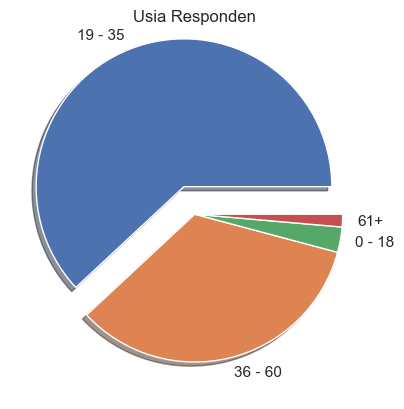

In [1455]:
bins = [0, 18, 35, 60, 100] 
labels = ['0 - 18', '19 - 35', '36 - 60', '61+']

raw['AgeRange'] = pd.cut(raw['Usia'], bins=bins, labels=labels, right=False)
raw['AgeRange'].value_counts().plot(kind='pie',
                                    explode = [0.2,0,0,0],
                                    shadow= True)
plt.title('Usia Responden')
plt.ylabel('')

responden terbanyak di range 19 - 35 yang merupakan usia produktif <br>
usia produktif : usia yang sering melakukan aktivitas online

### 2. Aktivitas Online di beberapa Domisili

/var/folders/nh/x_s256cx2xn0njptj47cyy9c0000gn/T/ipykernel_1045/1235929694.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  domisili['aktivitas online'] = raw['Aktivitas Online Meningkat'].map({'Ya' : 0,'Tidak' : 1,'Sama saja' : 2})


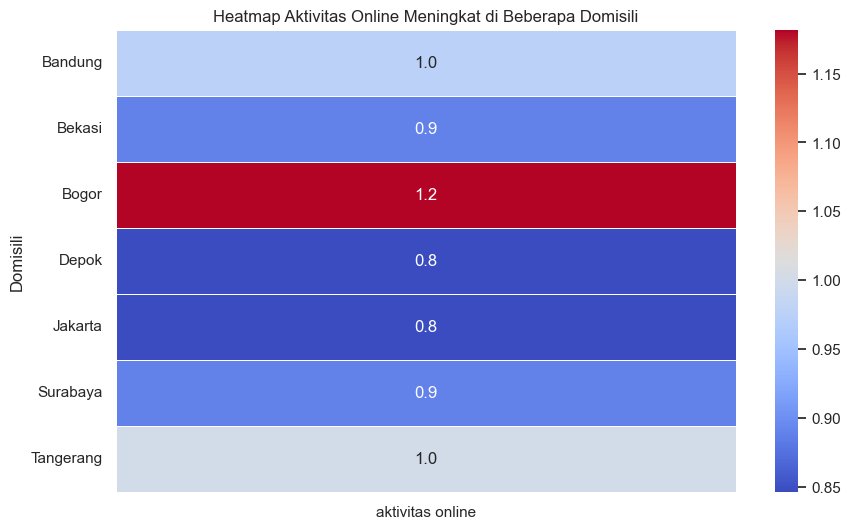

In [1456]:
domisili = raw[raw['Domisili'].isin(['Bandung','Jakarta','Tangerang','Depok','Bogor','Surabaya','Bekasi'])]
domisili['aktivitas online'] = raw['Aktivitas Online Meningkat'].map({'Ya' : 0,'Tidak' : 1,'Sama saja' : 2})

heatmap_data = domisili.pivot_table(index='Domisili', values='aktivitas online', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.title('Heatmap Aktivitas Online Meningkat di Beberapa Domisili')
plt.show()

Bogor memiliki aktivitas online meningkat tertinggi

### 3. Nominal Top Up Responden Karyawan Swasta dan Pegawai Negeri

In [1457]:
nominal_topup = raw['39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?']
nominal_topup.value_counts()

39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?
Rp 50.001 – Rp 100.000     74
> Rp 300.000               60
Rp 25.000 – Rp 50.000,-    44
Rp 150.001 – Rp 300.000    42
Rp 100.001 – Rp 150.000    36
< Rp 25.000,-               8
Name: count, dtype: int64

In [1458]:
nominal_topup = nominal_topup.replace({
    'Rp 50.001 – Rp 100.000'  : '50 - 100',
    '> Rp 300.000'             : '> 300',
    'Rp 25.000 – Rp 50.000,-'   : '25 - 50',
    'Rp 150.001 – Rp 300.000'   : '150 - 300',
    'Rp 100.001 – Rp 150.000'    : '100 - 150',
    '< Rp 25.000,-'             : '< 25'

})

In [1459]:
pelajar = raw[raw['Pekerjaan'].isin(['Pelajar / Mahasiswa'])]
swasta = raw[raw['Pekerjaan'].isin(['Karyawan Swasta'])]
negeri = raw[raw['Pekerjaan'].isin(['Pegawai Negeri'])]
# swasta = raw[raw['Pekerjaan'].isin(['Karyawan Swasta'])].sample(n=30, random_state=42)


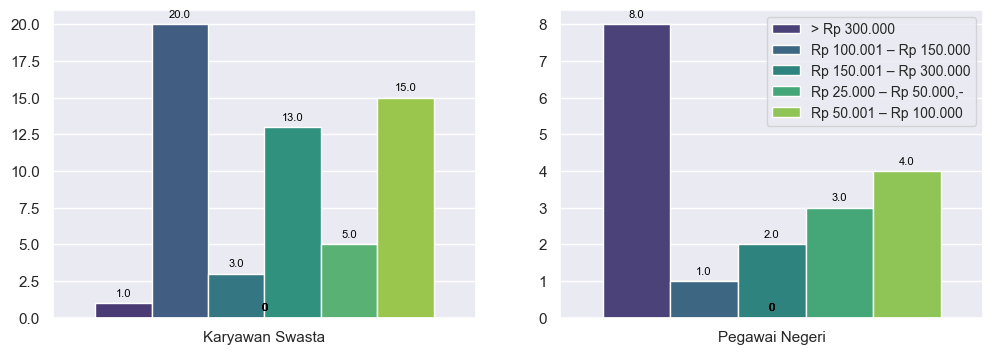

In [1460]:
# ax = sns.barplot(x = nominal_topup.value_counts().index,y=nominal_topup.value_counts(),palette='rocket')
# ax = plt.subplot(1,3,1)
# sns.barplot(x='Pekerjaan', y='Count', hue='39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?', data=pelajar.groupby(['Pekerjaan', '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?']).size().reset_index(name='Count'), palette='viridis')
# for p in ax.patches:
#     ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
#                 textcoords='offset points')
# plt.ylabel('')
# plt.xlabel('')
# ax.legend().set_visible(False)

fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(12, 4))
ax2 = plt.subplot(1,2,1)
sns.barplot(x='Pekerjaan', y='Count', hue='39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?', data=swasta.groupby(['Pekerjaan', '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?']).size().reset_index(name='Count'), palette='viridis')
for p in ax2.patches:
    ax2.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel('')
plt.xlabel('')
ax2.legend().set_visible(False)


ax3 = plt.subplot(1,2,2)
sns.barplot(x='Pekerjaan', y='Count', hue='39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?', data=negeri.groupby(['Pekerjaan', '39. Berapa biasanya nominal Anda melakukan top up/ isi ulang?']).size().reset_index(name='Count'), palette='viridis')
for p in ax3.patches:
    ax3.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=8, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.ylabel('')
plt.xlabel('')
ax3.set_ylabel('')
ax3.set_xlabel('')
ax3.legend(fontsize='small', loc='upper right')

* note : ada perbedaan jumlah sample yang jauh antara karyawan swasta dan pegawai negeri <br> <br>


### 4. Rentang Usia Mengalami Peningkatan Aktivitas Online

Text(0.5, 0, 'Rentang Usia')

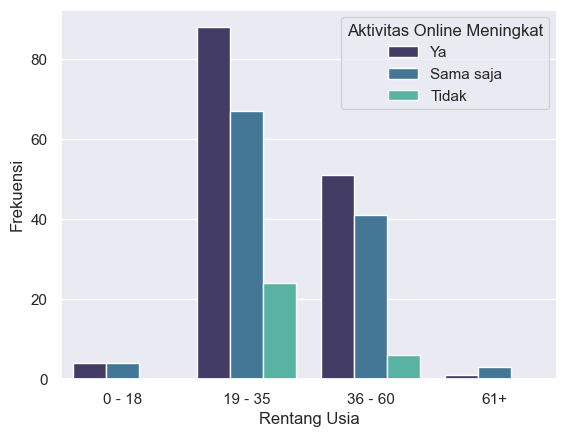

In [1461]:
sns.countplot(x='AgeRange',hue='Aktivitas Online Meningkat',data=raw,palette='mako')
plt.ylabel('Frekuensi')
plt.xlabel('Rentang Usia')

Usia produktif mengalami banyak peningkatan dibandingkan usia lainnya

### 5. Frekuensi Penggunaan Mobile Banking Berdasarkan Penghasilan per Bulan

In [1462]:
raw['Penghasilan per Bulan'].value_counts()

Penghasilan per Bulan
< Rp 2 juta               145
> Rp 10 juta               60
Rp 2 juta – Rp 5 juta      44
Rp 5 juta – Rp 10 juta     40
Name: count, dtype: int64

In [1463]:
raw3 = raw.copy()
# raw3['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'] = raw3['18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'].map({'> 10 kali per bulan' : '> 10','6-9 kali per bulan' : '6 - 9','2-5 kali per bulan':'2 - 5','Kurang dari/ setidaknya 1 kali per bulan': '≤ 1','Tidak Pernah' : '0'})
# raw3['Penghasilan per Bulan]'] = raw3['Penghasilan per Bulan'].replace({'< Rp 2 juta' : '< 2 jt',
#                                                                     '> Rp 10 juta' : '> 10 jt',
#                                                                     'Rp 2 juta – Rp 5 juta':'2 jt - 5 jt',
#                                                                     'Rp 5 juta – Rp 10 juta': '5 jt - 10 jt'})


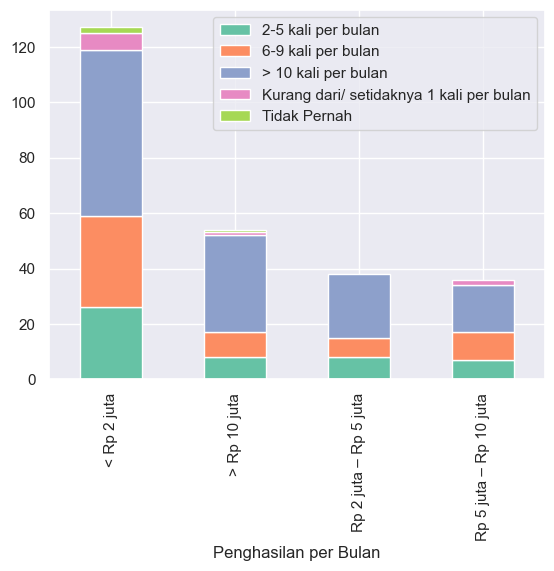

In [1464]:
warna = sns.color_palette("Set2")
raw3.groupby(['Penghasilan per Bulan', '18. Bagaimana frekuensi penggunaan Channel Bank berikut? [Mobile Banking ]'])['Penghasilan per Bulan'].size().unstack().plot(kind='bar',stacked=True,color=warna)
plt.legend(loc='upper right')

### 6. Frekuensi Top Up dengan Penghasilan per Bulan 

In [1465]:
raw2 = raw.copy()
raw2['40. Berapa frekuensi top up/ Isi ulang ?'].value_counts()
raw2['40. Berapa frekuensi top up/ Isi ulang ?'] = raw2['40. Berapa frekuensi top up/ Isi ulang ?'].map({
    'Sering (kurang lebih 1 kali seminggu)' : 'Sering',
    'Hanya mengisi jika akan menggunakan'   : 'Sangat Jarang',
    'Jarang (kurang lebih 1 kali sebulan) Sangat jarang' : 'Jarang',
    'Sangat Sering (beberapa kali dalam seminggu)' : 'Sangat Sering'
                                                                                                         })

In [1466]:
raw2 = raw2[['40. Berapa frekuensi top up/ Isi ulang ?', 'Penghasilan per Bulan']].dropna()

In [1467]:
raw2['40. Berapa frekuensi top up/ Isi ulang ?'].value_counts()

40. Berapa frekuensi top up/ Isi ulang ?
Sering           91
Sangat Jarang    70
Jarang           59
Sangat Sering    42
Name: count, dtype: int64

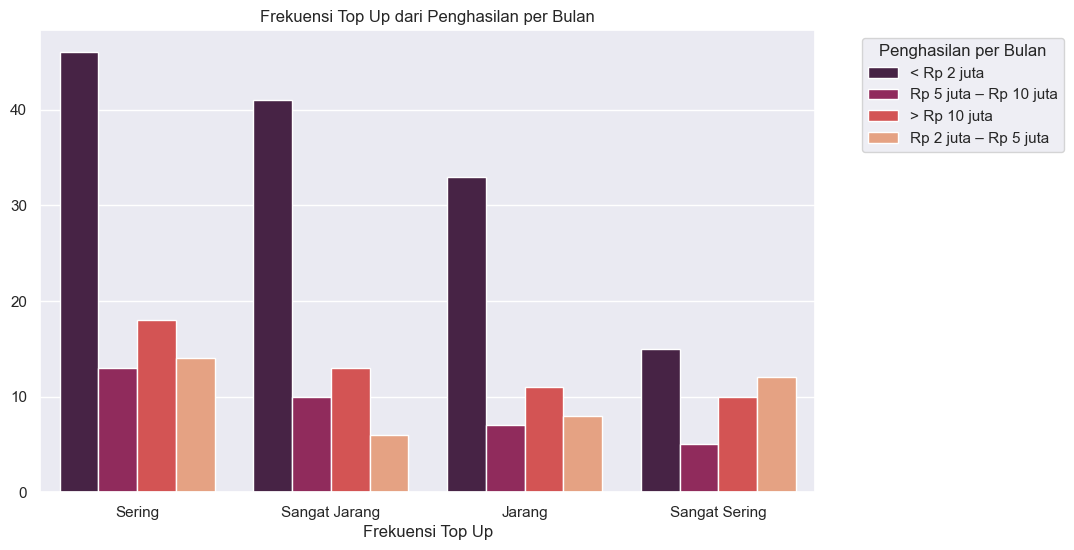

In [1468]:
plt.figure(figsize=(10,6))
sns.countplot(
    x='40. Berapa frekuensi top up/ Isi ulang ?',
    hue='Penghasilan per Bulan',
    data = raw2,
    palette='rocket',
    order=raw2['40. Berapa frekuensi top up/ Isi ulang ?'].value_counts().index,
    hue_order=raw2['Penghasilan per Bulan'].unique())

plt.title('Frekuensi Top Up dari Penghasilan per Bulan')
plt.xlabel('Frekuensi Top Up')
plt.ylabel('')
plt.legend(title='Penghasilan per Bulan', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## 3. Univariate Analysis <br>

### a. Confidence interval 95% for one-sample proportion

In [1469]:
CL = 0.95
zdist = st.norm.ppf((1 + CL ) / 2)
def p_error(p,n): 
    return math.sqrt(p * (1-p)/n)

##### i. Durasi Penggunaan Internet per Hari (dalam Jam)

In [1470]:
durasi = raw['Durasi Penggunaan Internet per Hari (dalam Jam)']

In [1471]:
# ambil durasi 8 jam
durasi_n = durasi.count()
durasi_8 = (durasi == 8 ).sum()
p_8 = durasi_8/durasi_n

In [1472]:
CI_bawah = p_8 - (zdist * p_error(p_8,durasi_n))
CI_atas = p_8 + (zdist * p_error(p_8,durasi_n))
print(f"{round(CI_bawah,2)} < p < {round(CI_atas,2)}")

0.3 < p < 0.41


##### ii. Usia Responden

In [1473]:
usia = raw['Usia']

In [1474]:
# ambil usia 20 tahun
usia_20 = (usia == 20).sum()
usia_n = usia.count()
p_20 = usia_20/usia_n

In [1475]:
CI_bawah = p_20 - (zdist * p_error(p_20,usia_n))
CI_atas = p_20 + (zdist * p_error(p_20,usia_n))
print(f"{round(CI_bawah,3)} < p < {round(CI_atas,3)}")

0.063 < p < 0.131


##### iii. Frekuensi Belanja Online 6 Bulan Terakhir di Bandung 

In [1476]:
bandung = raw.loc[raw['Domisili']== 'Bandung']
frek_6 = bandung['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'].astype(str)

In [1477]:
frek_n = bandung['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'].count()
meningkat = (frek_6 == 'Meningkat').sum()
p_meningkat = meningkat/(frek_n)

In [1478]:
CI_bawah = p_meningkat - (zdist * p_error(p_meningkat,frek_n))
CI_atas = p_meningkat + (zdist * p_error(p_meningkat,frek_n))
print(f"{round(CI_bawah,3)} < p < {round(CI_atas,3)}")

0.205 < p < 0.41


### b. One sample Z-test for proportion dengan alpha = 5%

In [1479]:
alpha = 0.05
def ztest(pa,ph,n):
    return ((pa-ph) / math.sqrt((ph * (1-ph))/n))
def p_value(z_test):
    return (1-stats.norm.cdf(z_test))

z_crit = stats.norm.ppf(1-alpha)

##### i. Durasi Penggunaan Internet per Hari (dalam Jam)

h0  : proposi durasi 8 jam adalah 0.25 <br><br>
h1  : proposi durasi 8 jam bukan 0.25

In [1480]:
durasi = raw['Durasi Penggunaan Internet per Hari (dalam Jam)']
durasi_8 = (durasi == 8).sum()
durasi_n = durasi.count()
p_8 = durasi_8/durasi_n
h_8 = 0.25
p_val = p_value(ztest(p_8,h_8,durasi_n))

In [1481]:
# Approach satu :  menggunakan Z critical
if (ztest(p_8,h_8,durasi_n)) > z_crit:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Reject Hypothesis


In [1482]:
# Approach dua : menggunakan p value
if (p_val) < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Reject Hypothesis


#### ii. Responden yang Bekerja Sebagai Pegawai Negeri <br>
note : pekerjaan sudah diubah sesuai kebutuhan

h0  : Proporsi Responden adalah Pegawai Negeri ≤ 0.06 <br> <br>
h1  : Proporsi Responden adalah Pegawai Negeri > 0.06


In [1483]:
pekerjaan = raw['Pekerjaan']
pegawai_negeri = (pekerjaan == 'Pegawai Negeri').sum()
pekerjaan_n = pekerjaan.count()
p_pegawai = pegawai_negeri / pekerjaan_n
h_pegawai = 0.06
p_val_pegawai = p_value(ztest(p_pegawai,h_pegawai,pekerjaan_n))

In [1484]:
# Approach satu :  menggunakan Z critical
if (ztest(p_pegawai,h_pegawai,pekerjaan_n)) > z_crit:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

Accept Hypothesis


In [1485]:
# Approach dua : menggunakan p value
print(f"p value = {p_val_pegawai}")
if (p_val_pegawai) < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

p value = 0.12420017338902856
Accept Hypothesis


#### iii. Food Delivery : GrabFood <br>

h0  : Proporsi Responden menggunakan GrabFood ≤ 0.3 <br> <br>
h1  : Proporsi Responden adalah Pegawai Negeri > 0.3


In [1486]:
food_del = raw['50. Apakah Anda pernah menggunakan layanan Food Delivery (pembelian makanan/ minuman secara online )? Jika Pernah, mohon sebutkan layanan yang PALING sering Anda gunakan?']
grab = (food_del == 'GrabFood').sum()
food_del_n = food_del.count()
p_grab = grab / food_del_n
h_grab = 0.3
p_val_grab = p_value(ztest(p_grab,h_grab,food_del_n))


In [1487]:
# Approach dua : menggunakan p value
print(f"p value = {p_val_grab}")
if (p_val_grab) < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

p value = 0.9825196132089179
Accept Hypothesis


### c. Chi-squared test for goodness-of-fit test dengan alpha = 5% <br>
The Chi-square goodness of fit test is a statistical hypothesis test used to determine whether a variable is likely to come from a specified distribution or not

In [1488]:
alpha = 0.05
def chi2(o,e,n):
    for i in range(n):
        result = round(((o - e)**2)/e,2)
    return result

#### i. Gender Responden

h0  : Jenis kelamin terdistribusi normal <br>
h0  : Jenis kelamin terdistribusi bukan normal <br>

In [1489]:
gender = raw['Jenis Kelamin']
wanita = (gender == 'Wanita').sum()
pria = (gender == 'Pria').sum()
expected = 144

In [1490]:
diff_wanita = chi2(wanita,expected,gender.count())
diff_pria = chi2(pria,expected,gender.count())

In [1491]:
chi_gender = pd.DataFrame({
    'Gender'    : ['Pria','Wanita'],
    'Observed'  : [pria,wanita],
    'Expected'  : expected,
    '((O − E)2)/E'  : [diff_pria,diff_wanita]
    })
chi_gender

,Gender,Observed,Expected,((O − E)2)/E
0,Pria,132,144,1.00
1,Wanita,157,144,1.17


In [1492]:
chi_squared = diff_pria+diff_wanita
df = 1
crit_value = stats.chi2.ppf((1-alpha), df)
print(f'chi squared = {chi_squared}')
print(f'crit value = {crit_value}')

if (chi_squared > crit_value):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

chi squared = 2.17
crit value = 3.841458820694124
Accept Null Hypothesis


#### ii. Kecenderungan Belanja pada Fashion dan Mode di Jakarta

In [1493]:
jakarta = raw[raw['Domisili'] == 'Jakarta']

In [1494]:
jakarta.loc[:, '47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]'] = jakarta['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]'].replace('offline/ langsung datang ke toko fisik', 'offline')
kecenderungan = jakarta['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [fashion & mode]']
offline = (kecenderungan == 'offline').sum()
online = (kecenderungan == 'online').sum()
expected = len(kecenderungan) / 2

In [1495]:
diff_offline = chi2(offline,expected,kecenderungan.count())
diff_online = chi2(online,expected,kecenderungan.count())

In [1496]:
chi_aktiv = pd.DataFrame({
    'Aktivitas'    : ['Online','Offline'],
    'Observed'  : [online,offline],
    'Expected'  : expected,
    '((O − E)2)/E'  : [diff_online,diff_offline]
    })
chi_aktiv

,Aktivitas,Observed,Expected,((O − E)2)/E
0,Online,27,36.0,2.25
1,Offline,37,36.0,0.03


In [1497]:
chi_squared = diff_online+diff_offline
df = 1
crit_value = stats.chi2.ppf((1-alpha), df)
print(f'chi squared = {chi_squared}')
print(f'crit value = {crit_value}')

if (chi_squared > crit_value):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

chi squared = 2.28
crit value = 3.841458820694124
Accept Null Hypothesis


#### iii. Pendidikan Terakhir : Sekolah dan Pendidikan Tinggi

In [1498]:
pendidikan = raw['Pendidikan Terakhir']


In [1499]:
pendidikan.replace(['SMP', 'SMK', 'SMA'], 'Sekolah', inplace=True)
pendidikan.replace(['D1', 'D4', 'D3', 'S1', 'S2', 'S3'], 'Pendidikan tinggi', inplace=True)

In [1500]:
pendidikan_tinggi = (pendidikan == 'Pendidikan tinggi').sum()
sekolah = (pendidikan == 'Sekolah').sum()
expected = round(len(pendidikan) / 2,0)

In [1501]:
diff_pendidikantinggi = chi2(pendidikan_tinggi,expected,pendidikan.count())
diff_sekolah = chi2(sekolah,expected,pendidikan.count())

In [1502]:
chi_pendidikan = pd.DataFrame({
    'Pendidikan'    : ['Pendidikan Tinggi','Sekolah'],
    'Observed'  : [pendidikan_tinggi,sekolah],
    'Expected'  : expected,
    '((O − E)2)/E'  : [diff_pendidikantinggi,diff_sekolah]
    })
chi_pendidikan

,Pendidikan,Observed,Expected,((O − E)2)/E
0,Pendidikan Tinggi,162,144.0,2.25
1,Sekolah,127,144.0,2.01


In [1503]:
chi_pendidikan = diff_pendidikantinggi+diff_sekolah
df = 1
crit_value = stats.chi2.ppf((1-alpha), df)
print(f'chi squared = {chi_squared}')
print(f'crit value = {crit_value}')

if (chi_squared > crit_value):
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypothesis")

chi squared = 2.28
crit value = 3.841458820694124
Accept Null Hypothesis


## 4. Multivariate Analysis <br>

### a. Confidence interval 95% for two-sample proportion difference

In [1504]:
CL = 0.95
zdist = st.norm.ppf((1 + CL ) / 2)

def ci_atas(p1,p2,n1,n2,z):
    return ((p1-p2) + (z * (math.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2)))))
def ci_bawah(p1,p2,n1,n2,z):
    return ((p1-p2) - (z * (math.sqrt((p1*(1-p1)/n1) + (p2*(1-p2)/n2)))))

#### i. Bank BCA dan Bank Mandiri

In [1505]:
bank = pd.DataFrame({
    'Bank BNI': [(raw['bank_1'] == 'Bank BNI').sum()],
    'Bank Mandiri': [(raw['bank_2'] == 'Bank Mandiri').sum()],
    'Bank BCA': [(raw['bank_3'] == 'Bank BCA').sum()],
    'Bank CIMB Niaga': [(raw['bank_4'] == 'Bank CIMB Niaga').sum()],
    'Bank BRI': [(raw['bank_5'] == 'Bank BRI').sum()],
    'Bank BTN': [(raw['bank_6'] == 'Bank BTN').sum()],
    'Bank Permata': [(raw['bank_7'] == 'Bank Permata').sum()],
    'Total'        :(raw['bank_1'] == 'Bank BNI').sum() + (raw['bank_2'] == 'Bank Mandiri').sum() + (raw['bank_3'] == 'Bank BCA').sum() + (raw['bank_4'] == 'Bank CIMB Niaga').sum()
    + (raw['bank_5'] == 'Bank BRI').sum() + (raw['bank_6'] == 'Bank BTN').sum() + (raw['bank_7'] == 'Bank Permata').sum()
})
bank = bank.T.rename(columns={0: 'Frequencies'})
total = 406

In [1506]:
p_mandiri = (raw['bank_2'] == 'Bank Mandiri').sum() / total
p_bca = (raw['bank_3'] == 'Bank BCA').sum() / total
mandiri_n  = (raw['bank_2'] == 'Bank Mandiri').sum()
bca_n = (raw['bank_3'] == 'Bank BCA').sum()


In [1507]:
CI_atas = ci_atas(p_bca,p_mandiri,bca_n,mandiri_n,zdist)
CI_bawah = ci_bawah(p_bca,p_mandiri,bca_n,mandiri_n,zdist)

In [1508]:
print(f"{round(CI_bawah,2)} < p < {round(CI_atas,2)}")

0.05 < p < 0.28


#### ii. eMoney GoPay dan eMoney OVO

In [1509]:
gopay = (raw['emoney_pilihan_1'] == 'GoPay').sum()
shopee = (raw['emoney_pilihan_2'] == 'ShopeePay').sum()
ovo= (raw['emoney_pilihan_3'] == 'OVO').sum()
dana= (raw['emoney_pilihan_4'] == 'Dana').sum()
mandiri= (raw['emoney_pilihan_5'] == 'eMoney Mandiri').sum()
bca= (raw['emoney_pilihan_6'] == 'Flazz BCA').sum()
linkaja= (raw['emoney_pilihan_7'] == 'LinkAja').sum()
tidakpakai= (raw['emoney_pilihan_8'] == 'Tidak Menggunakan eMoney').sum()
brizzi= (raw['emoney_pilihan_9'] == 'Brizzi').sum()
jakcard = (raw['emoney_pilihan_10'] == 'JakCard').sum()
isaku = (raw['emoney_pilihan_11'] == 'iSaku').sum()


In [1510]:
emoney = pd.DataFrame({
    'Gopay' : [gopay],
    'ShopeePay' : [shopee],
    'Ovo' : [ovo],
    'Dana'  : [dana],
    'eMoney Mandiri'   : [mandiri],
    'Flazz BCA'   : [bca],
    'LinkAja'   : [linkaja],
    'Brizzi' : [brizzi],
    'JakCard' : [jakcard],
    'iSaku' : [isaku],
    'Tidak memakai eMoney'  : [tidakpakai],
    'Total' : gopay + shopee + ovo + dana + mandiri + bca + linkaja + tidakpakai + brizzi + jakcard + isaku
})
emoney = emoney.T.rename(columns={0: 'Frequencies'})
total = 881
emoney

,Frequencies
Gopay,225
ShopeePay,171
Ovo,163
Dana,95
eMoney Mandiri,84
Flazz BCA,54
LinkAja,43
Brizzi,17
JakCard,2
iSaku,3


In [1550]:
p_gopay = gopay / total
p_ovo = ovo / total

CI_atas_govo = ci_atas(p_gopay,p_ovo,gopay,ovo,zdist)
CI_bawah_govo = ci_bawah(p_gopay,p_ovo,gopay,ovo,zdist)


In [1551]:
print(f"{round(CI_bawah_govo,2)} < p < {round(CI_atas_govo,2)}")

-0.01 < p < 0.15


#### iii. eMoney ShopeePay dan eMoney Dana

In [1513]:
p_shopee = shopee / total
p_dana = dana / total

CI_atas = ci_atas(p_shopee,p_dana,gopay,ovo,zdist)
CI_bawah = ci_bawah(p_shopee,p_dana,gopay,ovo,zdist)


In [1514]:
print(f"{round(CI_bawah,2)} < p < {round(CI_atas,2)}")

0.02 < p < 0.16


### b. Two-samples Z-test for proportion difference dengan alpha = 5%

In [1515]:
alpha = 0.05
z_crit = stats.norm.ppf(1-alpha)
def p_avg(p1,p2,n1,n2):
    return ((n1 * p1) + ( n2 * p2 ) / (n1 + n2))
def var(p,n1,n2):
    return ((p)*(1-p) * (1/n1 + 1/n2))
def z_test(p1,p2,var):
    return((p1-p2)/math.sqrt(var))

#### i. Bank BCA dan Bank Mandiri

H0  : Dua proporsi sama <br> <br>
H1  : Dua proporsi tidak sama

In [1516]:
ztest = z_test(p_bca,p_mandiri,var(p_avg(p_bca,p_mandiri,p_bca,p_mandiri),bca,mandiri))
print(f"Z Test      : {round(ztest,2)}")
print(f"Z Critical  : {round(z_crit,2)}")

if (ztest > z_crit or ztest < (-z_crit)):
    print("-> Reject Null Hypothesis")
else:
    print("-> Accept Null Hypothesis")

Z Test      : 2.16
Z Critical  : 1.64
-> Reject Null Hypothesis


#### ii. eMoney GoPay dan eMoney OVO

H0  : Dua proporsi sama <br> <br>
H1  : Dua proporsi tidak sama

In [1517]:
ztest = z_test(p_gopay,p_ovo,var(p_avg(p_gopay,p_ovo,p_gopay,p_ovo),gopay,ovo))
print(f"Z Test      : {round(ztest,2)}")
print(f"Z Critical  : {round(z_crit,2)}")

if (ztest > z_crit or ztest < (-z_crit)):
    print("-> Reject Null Hypothesis")
else:
    print("-> Accept Null Hypothesis")

Z Test      : 1.95
Z Critical  : 1.64
-> Reject Null Hypothesis


#### iii. eMoney ShopeePay dan eMoney Dana

H0  : Dua proporsi sama <br> <br>
H1  : Dua proporsi tidak sama

In [1518]:
ztest = z_test(p_shopee,p_dana,var(p_avg(p_shopee,p_dana,p_shopee,p_dana),shopee,dana))
print(f"Z Test      : {round(ztest,2)}")
print(f"Z Critical  : {round(z_crit,2)}")

if (ztest > z_crit or ztest < (-z_crit)):
    print("-> Reject Null Hypothesis")
else:
    print("-> Accept Null Hypothesis")

Z Test      : 2.54
Z Critical  : 1.64
-> Reject Null Hypothesis


### c. Chi-squared test for independence dengan alpha = 5% <br>
The Chi-Square test of independence is used to determine if there is a significant relationship between two nominal (categorical) variables <br>
https://www.pythonfordatascience.org/chi-square-test-of-independence-python/

#### i. Gender dan Frekuensi Top Up eMoney di Jakarta

h0  : gender dan frekuensi top up emoney tidak berhubungan <br>
h1  : gender dan frekuensi top up emoney  berhubungan <br>

In [1519]:
jakarta = raw[raw['Domisili'] == 'Jakarta']

In [1520]:
# buat variable jakarta baru biar ga ganggu variable jakarta
jakarta1 = jakarta.copy()
jakarta1['40. Berapa frekuensi top up/ Isi ulang ?'].value_counts()

40. Berapa frekuensi top up/ Isi ulang ?
Sering (kurang lebih 1 kali seminggu)                 25
Jarang (kurang lebih 1 kali sebulan) Sangat jarang    14
Hanya mengisi jika akan menggunakan                   12
Sangat Sering (beberapa kali dalam seminggu)           9
Name: count, dtype: int64

In [1521]:
# mapping sesuai kebutuhan
jakarta1['40. Berapa frekuensi top up/ Isi ulang ?'] = jakarta1['40. Berapa frekuensi top up/ Isi ulang ?'].replace({
    'Sangat Jarang': 'Jarang',
    'Jarang': 'Jarang',
    'Sangat Sering': 'Sering',
    'Sering': 'Sering'
})

In [1522]:
pria_jakarta = jakarta1.loc[jakarta['Jenis Kelamin'] == 'Pria']
wanita_jakarta = jakarta1.loc[jakarta['Jenis Kelamin'] == 'Wanita']

pria_count = (pria_jakarta['Jenis Kelamin'] == 'Pria').sum()
wanita_count = (wanita_jakarta['Jenis Kelamin'] == 'Wanita').sum()


In [1523]:
sering_wanita = (wanita_jakarta['40. Berapa frekuensi top up/ Isi ulang ?'] == 'Sering').sum()
sering_pria = (pria_jakarta['40. Berapa frekuensi top up/ Isi ulang ?'] == 'Sering').sum()

jarang_pria = (pria_jakarta['40. Berapa frekuensi top up/ Isi ulang ?'] == 'Jarang').sum()
jarang_wanita = (wanita_jakarta['40. Berapa frekuensi top up/ Isi ulang ?'] == 'Jarang').sum()


In [1524]:
crosstab = pd.crosstab(jakarta1['Jenis Kelamin'],jakarta1['40. Berapa frekuensi top up/ Isi ulang ?'])
crosstab

40. Berapa frekuensi top up/ Isi ulang ?,Hanya mengisi jika akan menggunakan,Jarang (kurang lebih 1 kali sebulan) Sangat jarang,Sangat Sering (beberapa kali dalam seminggu),Sering (kurang lebih 1 kali seminggu)
Jenis Kelamin,,,,
Pria,3,8,2,16
Wanita,9,6,7,9


In [1525]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')
if pval < alpha:
    print("Reject Null Hypothesis")
    print("gender dan frekuensi top up emoney  berhubungan")
else:
    print("Accept Null Hypothesis")
    print("gender dan frekuensi top up emoney tidak  berhubungan")


Chi Squared     : 7.965676148101062,
P Value         : 0.04672642808891637,
df              : 3,
Expected Array  : 
[[ 5.8         6.76666667  4.35       12.08333333]
 [ 6.2         7.23333333  4.65       12.91666667]]

Reject Null Hypothesis
gender dan frekuensi top up emoney  berhubungan


#### ii. Penghasilan per Bulan dan Frekuensi Belanja Online 

h0      : penghasilan per bulan tidak memengaruhi frekuensi belanja online <br>
h1      : penghasilan per bulan memengaruhi frekuensi belanja online

In [1526]:
crosstab = pd.crosstab(raw['Penghasilan per Bulan'],raw['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'])
crosstab

45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?,Meningkat,Menurun,Tetap
Penghasilan per Bulan,,,
< Rp 2 juta,46,29,67
> Rp 10 juta,23,6,31
Rp 2 juta – Rp 5 juta,18,6,20
Rp 5 juta – Rp 10 juta,14,8,17


In [1527]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')

if pval < alpha:
    print("Reject Null Hypothesis")
    print("penghasilan per bulan memengaruhi frekuensi belanja online")
else:
    print("Accept Null Hypothesis")
    print("penghasilan per bulan tidak memengaruhi frekuensi belanja online")


Chi Squared     : 4.5144604645531,
P Value         : 0.6074110816515281,
df              : 6,
Expected Array  : 
[[50.32280702 24.41403509 67.26315789]
 [21.26315789 10.31578947 28.42105263]
 [15.59298246  7.56491228 20.84210526]
 [13.82105263  6.70526316 18.47368421]]

Accept Null Hypothesis
penghasilan per bulan tidak memengaruhi frekuensi belanja online


### d. Chi-squared test for Homogeneity dengan alpha = 5% <br>
The chi-square test of homogeneity tests to see whether different columns (or rows) of data in a table come from the same population or not (i.e., whether the differences are consistent with being explained by sampling error alone) <br>
https://www.displayr.com/what-is-the-chi-square-test-of-homogeneity/#:~:text=The%20chi%2Dsquare%20test%20of%20homogeneity%20tests%20to%20see%20whether,explained%20by%20sampling%20error%20alone

#### i. Gender dan Frekuensi Belanja Online dalam 6 Bulan

ho  : Gender tidak memengaruhi frekuensi belanja online <br>
h1  : Gender memengaruhi frekuensi belanja online

In [1528]:
crosstab = pd.crosstab(raw['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'],raw['Jenis Kelamin'])
crosstab

Jenis Kelamin,Pria,Wanita
45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?,,
Meningkat,34,67
Menurun,23,26
Tetap,72,63


In [1529]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')
if pval < alpha:
    print("Reject Null Hypothesis")
    print("Gender memengaruhi frekuensi belanja online")
else:
    print("Accept Null Hypothesis")
    print("Gender tidak memengaruhi frekuensi belanja online")


Chi Squared     : 9.089536166934936,
P Value         : 0.010622635995510067,
df              : 2,
Expected Array  : 
[[45.71578947 55.28421053]
 [22.17894737 26.82105263]
 [61.10526316 73.89473684]]

Reject Null Hypothesis
Gender memengaruhi frekuensi belanja online


karena p val < alpha, maka kita bisa menolak h0 <br>
-> Gender memengaruhi frekuensi belanja online

#### ii. Pekerjaan dan Kecenderungan Berbelanja Kebutuhan Sehari - hari

ho  : Pekerjaan antara pelajar atau pegawai tidak memengaruhi kecenderungan pembelian keperluan sehari - hari secara offline/online <br>
h1  : Pekerjaan antara pelajar atau pegawai memengaruhi kecenderungan pembelian keperluan sehari - hari offline/online

In [1530]:
raw['Pekerjaan'].value_counts()
ibu_rumah = raw[raw['Pekerjaan'].isin(['Ibu Rumah Tangga','Pelajar / Mahasiswa']) ]

In [1531]:
pegawai = raw[raw['Pekerjaan'].isin(['Pegawai Negeri','Karyawan Swasta'])]
# pegawai = pegawai[pegawai['Durasi Penggunaan Internet per Hari (dalam Jam)'] > 8]

In [1532]:
raw1 = raw.copy()

In [1533]:
raw1['Pekerjaan'].value_counts()

Pekerjaan
Pelajar / Mahasiswa                             150
Karyawan Swasta                                  62
Ibu Rumah Tangga                                 23
Pegawai Negeri                                   22
Profesional ( Dokter, Dosen, Pengacara, dll)     14
Pengusaha                                        13
Pensiunan                                         4
Butuh harian lepas                                1
Name: count, dtype: int64

In [1534]:
raw1['Pekerjaan'] = raw1['Pekerjaan'].map({
    'Pegawai Negeri' : 'Pegawai',
    'Karyawan Swasta' : 'Pegawai',
    'Pelajar / Mahasiswa' : 'Pelajar'
})

In [1535]:
crosstab = pd.crosstab(raw1['Pekerjaan'],raw1['47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari]'])
crosstab

47. Bagaimana kecenderungan Anda jika akan berbelanja hal-hal berikut? [groceries / keperluan sehari- hari],offline/ langsung datang ke toko fisik,online
Pekerjaan,,
Pegawai,46,23
Pelajar,114,28


In [1536]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')
if pval < alpha:
    print("Reject Null Hypothesis")
    print("Pekerjaan antara pelajar atau pegawai memengaruhi kecenderungan pembelian keperluan sehari - hari offline/online")
else:
    print("Accept Null Hypothesis")
    print("Pekerjaan antara pelajar atau pegawai tidak memengaruhi kecenderungan pembelian keperluan sehari - hari offline/online")


Chi Squared     : 3.9829530129948476,
P Value         : 0.04596291650731353,
df              : 1,
Expected Array  : 
[[ 52.32227488  16.67772512]
 [107.67772512  34.32227488]]

Reject Null Hypothesis
Pekerjaan antara pelajar atau pegawai memengaruhi kecenderungan pembelian keperluan sehari - hari offline/online


## 5. Insight

Dataset ini merupakan dataset Aktivitas Online <br> <br>
dengan 289 responden dan terdapat 150 kolom

###

In [1537]:
raw

,Jenis Kelamin,Usia,Pendidikan Terakhir,Pekerjaan,Penghasilan per Bulan,Domisili,Durasi Penggunaan Internet per Hari (dalam Jam),Aktivitas Online Meningkat,Aktivitas yang Meningkat dalam 3 Bulan Terakhir,layanan_aktif_1,...,cara_pembayaran_belanja_online_6,cara_pembayaran_belanja_online_7,cara_pembayaran_belanja_online_8,keluhan_belanja_online_1,keluhan_belanja_online_2,keluhan_belanja_online_3,keluhan_belanja_online_4,keluhan_belanja_online_5,keluhan_belanja_online_6,AgeRange
0,Wanita,17,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Depok,8.0,Ya,Streaming video/ film,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN,0 - 18
1,Wanita,44,Pendidikan tinggi,Pegawai Negeri,> Rp 10 juta,Bandung,8.0,Sama saja,Melakukan video conference,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN,36 - 60
2,Wanita,24,Pendidikan tinggi,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Depok,10.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,Jumlah barang yang diterima kurang,Pembayaran telah dilakukan tetapi tidak terdet...,NaN,19 - 35
3,Wanita,20,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,4.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19 - 35
4,Pria,20,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,4.0,Tidak,NaN,Mobile Banking,...,NaN,NaN,menggunakan fitur Paylater,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN,19 - 35
5,Pria,20,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Jakarta,8.0,Ya,Mengikuti kelas online,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN,19 - 35
6,Wanita,20,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Depok,10.0,Tidak,NaN,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN,19 - 35
7,Pria,19,Sekolah,Pelajar / Mahasiswa,< Rp 2 juta,Bandung,4.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,NaN,NaN,NaN,NaN,NaN,19 - 35
8,Wanita,47,Pendidikan tinggi,Ibu Rumah Tangga,Rp 5 juta – Rp 10 juta,Jakarta,4.0,Sama saja,Akses media sosial,Mobile Banking,...,NaN,NaN,NaN,NaN,NaN,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN,36 - 60
9,Pria,47,Pendidikan tinggi,Karyawan Swasta,Rp 5 juta – Rp 10 juta,Jakarta,12.0,Sama saja,NaN,Mobile Banking,...,NaN,NaN,NaN,Barang yang diperoleh tidak sesuai dengan spes...,Barang rusak/ salah tetapi tidak dapat dikemba...,Pembayaran sudah dilakukan; barang tidak tersedia,NaN,NaN,NaN,36 - 60


Terdapat 289 Responden dengan identitas yang bervariasi : <br>
1. Pekerjaan <br>
2. Pendidikan Terakhir <br>
3. Domisili <br>
4. Umur

### 1. Insight 1

Salah satu faktor terbesar dari kemaksimalan dataset ini adalah umur responden, yang mayoritas berada di rentang 19 - 35. <br>
Usia ini merupakan usia produktif yang pastinya sering menggunakan berbagai aplikasi online

Text(0, 0.5, '')

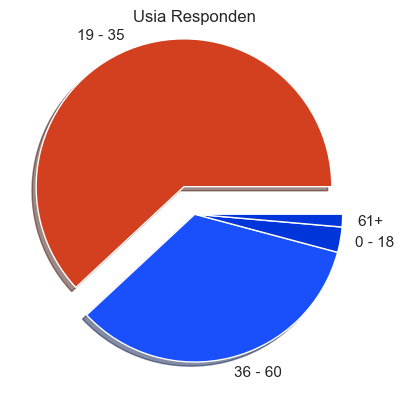

In [1538]:
bins = [0, 18, 35, 60, 100] 
labels = ['0 - 18', '19 - 35', '36 - 60', '61+']

raw['AgeRange'] = pd.cut(raw['Usia'], bins=bins, labels=labels, right=False)
raw['AgeRange'].value_counts().plot(kind='pie',
                                    explode = [0.2,0,0,0],
                                    shadow= True,
                                    colors=['#D34020','#1950FC','#0035DA','#0035DA'])
plt.title('Usia Responden')
plt.ylabel('')

Hal ini tentunya memaksimalkan hasil dari dataset ini

### 2 Insight 2

Untuk membuktikan Insight 1, dapat dilihat dari peningkatan Aktivitas Online dan terbanyak ada di rentang usia 19 - 35

Text(0.5, 0, 'Rentang Usia')

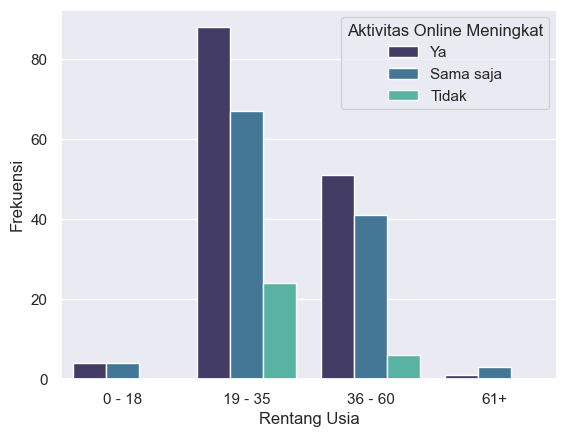

In [1539]:
sns.countplot(x='AgeRange',hue='Aktivitas Online Meningkat',data=raw,palette='mako')
plt.ylabel('Frekuensi')
plt.xlabel('Rentang Usia')

### 3. Insight 3

Kita bisa melihat ke kolom Durasi Penggunaan Internet per Hari (dalam Jam) untuk mengetahui durasi responden

In [1540]:
durasi # untuk melihat kolom Durasi Penggunaan Internet per Hari (dalam Jam)

0       8.0
1       8.0
2      10.0
3       4.0
4       4.0
5       8.0
6      10.0
7       4.0
8       4.0
9      12.0
10     18.0
11      8.0
12      8.0
13      3.0
14      3.0
15      7.0
16      8.0
17     10.0
18     10.0
19      4.0
20     14.0
21      8.0
22      8.0
23      5.0
24      2.0
25      8.0
26      7.0
27      5.0
28      6.0
29      8.0
30      8.0
31     12.0
32     13.0
33     16.0
34     10.0
35      8.0
36      8.0
37      8.0
38     12.0
39      8.0
40      8.0
41     10.0
42      8.0
43      8.0
44      8.0
45      8.0
46      8.0
47      8.0
48      8.0
49      8.0
50      2.0
51      8.0
52      8.0
53      8.0
54     12.0
55      8.0
56     11.0
57      9.0
58      5.0
59     12.0
60      2.0
61     17.0
62      8.0
63      8.0
64      8.0
65     12.0
66      8.0
67      4.0
68      8.0
69      5.0
70      8.0
71      8.0
72      8.0
73      8.0
74      6.0
75      8.0
76     15.0
77      8.0
78      8.0
79     12.0
80     12.0
81      5.0
82     14.0
83  

dari sini, saya bisa mendapatkan rata - rata durasi sebesar :

In [1541]:
print(f"Rata - Rata Durasi Penggunaan Internet per Hari (dalam Jam) : {durasi.mean()}")
print("Saya bulatkan ke bawah, menjadi 8 jam")

Rata - Rata Durasi Penggunaan Internet per Hari (dalam Jam) : 8.539792387543253
Saya bulatkan ke bawah, menjadi 8 jam


Saya 95% percaya kemungkinan saya untuk mendapatkan responden dengan durasi penggunaan internet selama 8 jam ada di rentang :

In [1542]:
CI_bawah = p_8 - (zdist * p_error(p_8,durasi_n))
CI_atas = p_8 + (zdist * p_error(p_8,durasi_n))
print(f"{round(CI_bawah,2)} < p < {round(CI_atas,2)}")

0.3 < p < 0.41


ini rentang  yang kecil, menandakan jumlah responden yang memiliki durasi 8 jam tidak banyak

### 4. Insight 4

Saya penasaran dengan aktivitas online di kota Bandung

Saya coba meninjau pembelanjaan online sebagai aktivitas online

Apakah frekuensi pembelajaan online di Bandung meningkat?

In [1543]:
CI_bawah = p_meningkat - (zdist * p_error(p_meningkat,frek_n))
CI_atas = p_meningkat + (zdist * p_error(p_meningkat,frek_n))
print(f"{round(CI_bawah,3)} < p < {round(CI_atas,3)}")

0.205 < p < 0.41


dari perhitungan di atas, saya 95% percaya kemungkinan saya mendapatkan responden Bandung yang mengalami peningkatan dalam belanja online adalah <br><br>
0.205 sampai 0.41

In [1544]:
frek_n = bandung['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'].count()
meningkat = (frek_6 == 'Meningkat').sum()

In [1545]:
print(f"di mana itu angka yang kecil karena jumlah responden Bandung yang meningkat adalah : {meningkat}")
print(f"Bandingkan dengan jumlah keseluruhan responden Bandung : {frek_n}")
print(f"Proposinya adalah : {round(p_meningkat,2)}")

di mana itu angka yang kecil karena jumlah responden Bandung yang meningkat adalah : 24
Bandingkan dengan jumlah keseluruhan responden Bandung : 78
Proposinya adalah : 0.31


Ini menandakan responden Bandung yang mengalami peningkatan dalam belanja online tidak terlalu banyak

### 5. Insight 5

Selanjutnya, saya penasaran dengan apakah banyak responden yang bekerja sebagai pegawai negeri?

saya berhipotesis : <br><br>
"Proporsi Responden adalah Pegawai Negeri ≤ 0.06"

setelah melewati perhitungan, saya mendapatkan :

In [1546]:
print(f"p value = {p_val_pegawai}")
if (p_val_pegawai) < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

p value = 0.12420017338902856
Accept Hypothesis


dan ternyata hipotesis saya benar

Tetapi, saya tetap perlu meninjau kembali apakah benar proposi responden pegawai negeri sebesar 0.06, karena jika berdasarkan p_pegawai, berikut proposi pegawai negeri : 

In [1547]:
print(f"Proposi pegawai negeri : {p_pegawai}")

Proposi pegawai negeri : 0.07612456747404844


Menandakan, saya kurang bukti untuk menolak hipotesis awal saya

### 6. Insight 6

Saya merupakan pengguna GrabFood, sehingga muncul pertanyaan : <br>
apakah para responden juga banyak menggunakan GrabFood?

Saya pun berhipotesis : <br>
Proposi GrabFood ≤ 0.3 <br>
agar saya bisa reject hypothesis saya

In [1548]:
# Approach dua : menggunakan p value
print(f"p value = {p_val_grab}")
if (p_val_grab) < alpha:
    print("Reject Hypothesis")
else:
    print("Accept Hypothesis")

p value = 0.9825196132089179
Accept Hypothesis


ternyata, perhitungan menunjukkan  menerima hypothesis. 

Artinya, tidak banyak responden yang menggunakan GrabFood

Ini bisa dibuktikan dari :

In [1549]:
print(f"Proposi responden menggunakan GrabFood : {p_grab}")

Proposi responden menggunakan GrabFood : 0.24305555555555555


### 7. Insight 7

Setelah mengetahui pengguna GrabFood tidak banyak, apakah itu menandakan pengguna OVO juga tidak banyak? <br>
karena OVO merupakan eMoney yang digunakan Grab

Saya coba membandingkan dengan pesaing Grab yang juga terkenal, yaitu eMoney yang digunakan Gojek, Gopay

Saya membandingkan apakah ada perbedaan signifikan antara Gopay dan OVO

In [1552]:
p_gopay = gopay / total
p_ovo = ovo / total

CI_atas_govo = ci_atas(p_gopay,p_ovo,gopay,ovo,zdist)
CI_bawah_govo = ci_bawah(p_gopay,p_ovo,gopay,ovo,zdist)

print(f"{round(CI_bawah_govo,2)} < p < {round(CI_atas_govo,2)}")

-0.01 < p < 0.15


Ini menandakan perbedaan OVO dan Gopay tidak akan lebih rendah dari -0.01 sampai 0.15. <br>


Karena interval kecil, ini menandakan GoPay memiliki proposi lebih besar dari OVO 

Kesimpulan -> Gopay lebih banyak digunakan dibandingkan OVO

### 8. Insight 8

Agar lebih yakin, saya menambahkan hipotesis : <br>
Proposi Gopay dan Ovo sama

Berdasarkan perhitungan, saya mendapatkan ; <br>

In [1553]:
ztest = z_test(p_gopay,p_ovo,var(p_avg(p_gopay,p_ovo,p_gopay,p_ovo),gopay,ovo))
print(f"Z Test      : {round(ztest,2)}")
print(f"Z Critical  : {round(z_crit,2)}")

if (ztest > z_crit or ztest < (-z_crit)):
    print("-> Reject Null Hypothesis")
else:
    print("-> Accept Null Hypothesis")

Z Test      : 1.95
Z Critical  : 1.64
-> Reject Null Hypothesis


Hipotesis saya ditolak, menandakan proposi GoPay dan OVO tidak sama. <br>
Ini makin membuktikan proposi GoPay lebih banyak dari OVO

### 9. Insight 9

Setelah mengetahui proposi eMoney, sekarang saya ingin mengetahui mengenai top up eMoney. <br>
Saya coba membagi berdasarkan gender dan menggunakan domisili Jakarta karena Jakarta merupakan tempat orang sering melakukan aktivitas online

Saya berhipotesis : <br>
gender dan frekuensi top up emoney tidak berhubungan

Menggunakan Chi-Squared, saya mendapatkan

In [1556]:
crosstab = pd.crosstab(jakarta1['Jenis Kelamin'],jakarta1['40. Berapa frekuensi top up/ Isi ulang ?'])
crosstab

40. Berapa frekuensi top up/ Isi ulang ?,Hanya mengisi jika akan menggunakan,Jarang (kurang lebih 1 kali sebulan) Sangat jarang,Sangat Sering (beberapa kali dalam seminggu),Sering (kurang lebih 1 kali seminggu)
Jenis Kelamin,,,,
Pria,3,8,2,16
Wanita,9,6,7,9


In [1557]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')
if pval < alpha:
    print("Reject Null Hypothesis")
    print("gender dan frekuensi top up emoney  berhubungan")
else:
    print("Accept Null Hypothesis")
    print("gender dan frekuensi top up emoney tidak  berhubungan")


Chi Squared     : 7.965676148101062,
P Value         : 0.04672642808891637,
df              : 3,
Expected Array  : 
[[ 5.8         6.76666667  4.35       12.08333333]
 [ 6.2         7.23333333  4.65       12.91666667]]

Reject Null Hypothesis
gender dan frekuensi top up emoney  berhubungan


Ternyata, gender memengaruhi frekuensi top up di Jakarta

### 10. Insight 10

Karena gender memengaruhi top up di Jakarta, saya bisa melanjutkan pertanyaan hubungan  lebih lanjut ke seluruh domisili : <br>
Gender dan Frekuensi Belanja Online dalam 6 Bulan

Saya berhipotesis : <br>
Gender tidak memengaruhi frekuensi belanja online


Berdasarkan perhitungan, saya mendapatkan :

In [1558]:
crosstab = pd.crosstab(raw['45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?'],raw['Jenis Kelamin'])
crosstab

Jenis Kelamin,Pria,Wanita
45. Bagaimana frekuensi Anda melakukan belanja online dalam 6 bulan terakhir?,,
Meningkat,34,67
Menurun,23,26
Tetap,72,63


In [1559]:
test, pval,df,expec_arr = stats.chi2_contingency(crosstab)
print(f'''
Chi Squared     : {test},
P Value         : {pval},
df              : {df},
Expected Array  : 
{expec_arr}
''')
if pval < alpha:
    print("Reject Null Hypothesis")
    print("Gender memengaruhi frekuensi belanja online")
else:
    print("Accept Null Hypothesis")
    print("Gender tidak memengaruhi frekuensi belanja online")


Chi Squared     : 9.089536166934936,
P Value         : 0.010622635995510067,
df              : 2,
Expected Array  : 
[[45.71578947 55.28421053]
 [22.17894737 26.82105263]
 [61.10526316 73.89473684]]

Reject Null Hypothesis
Gender memengaruhi frekuensi belanja online


Secara keseluruhan, gender memengaruhi top up dan juga frekuensi belanja online